# About the Project
This notebook is only a part of a bigger project of a website used to predict if a company in the U.S has a chance to be IPO, Acquired, or Failed using Machine Learning techniques and algorithms (whether it's regression or classification).

# Personal Goal
This project will be where I practice my machine learning technique and potentially web development skills. Right now, the focus of this notebook is to be able to create the best models for prediction/classification.

# About the Data
   The [🚀Startup Success/Fail Dataset from Crunchbase](https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase) contains informations of different start-up from all around the world such as their demographics, the industries/categories that these companies focuses on, the amount of fundings they received, etc.
## Call Libraries and Read Files


In [1]:
# Package Import
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
csv = pd.read_csv(
    '/kaggle/input/big-startup-secsees-fail-dataset-from-crunchbase/big_startup_secsees_dataset.csv')
csv.head(20)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18


# Data Cleaning
## General Information About the Data

In [3]:
# shows dtypes of each column
csv.dtypes

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object

In [4]:
# shows total null-values existed within each column
csv.isnull().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

From the dtypes and null-values description, here are some error that I was able to quickly identify:
- *funding_total_usd* is not ```float``` type and there are missing data value replaced by "-"
- *founded_at, first_funding_at, and last_funding_at* are not in ```datetime``` dtype
- Abnormal value for *founded_at, first_funding_at, and last_funding_at* is unknown, need to check if there are dates that exceed today's date

## Null-Value Identification

Null-values have major influence on analysis and model training because with them well-enough, there will be error in everything we do (i.e. wrong analysis, bad model for prediction/classification).

First, let's have a look at the null-value existed in this dataset. Below is the total number of null-values existed in each column and the visualization of the null values:

In [5]:
# output info about null-values in each column
csv.isnull().sum()             


permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

<AxesSubplot: >

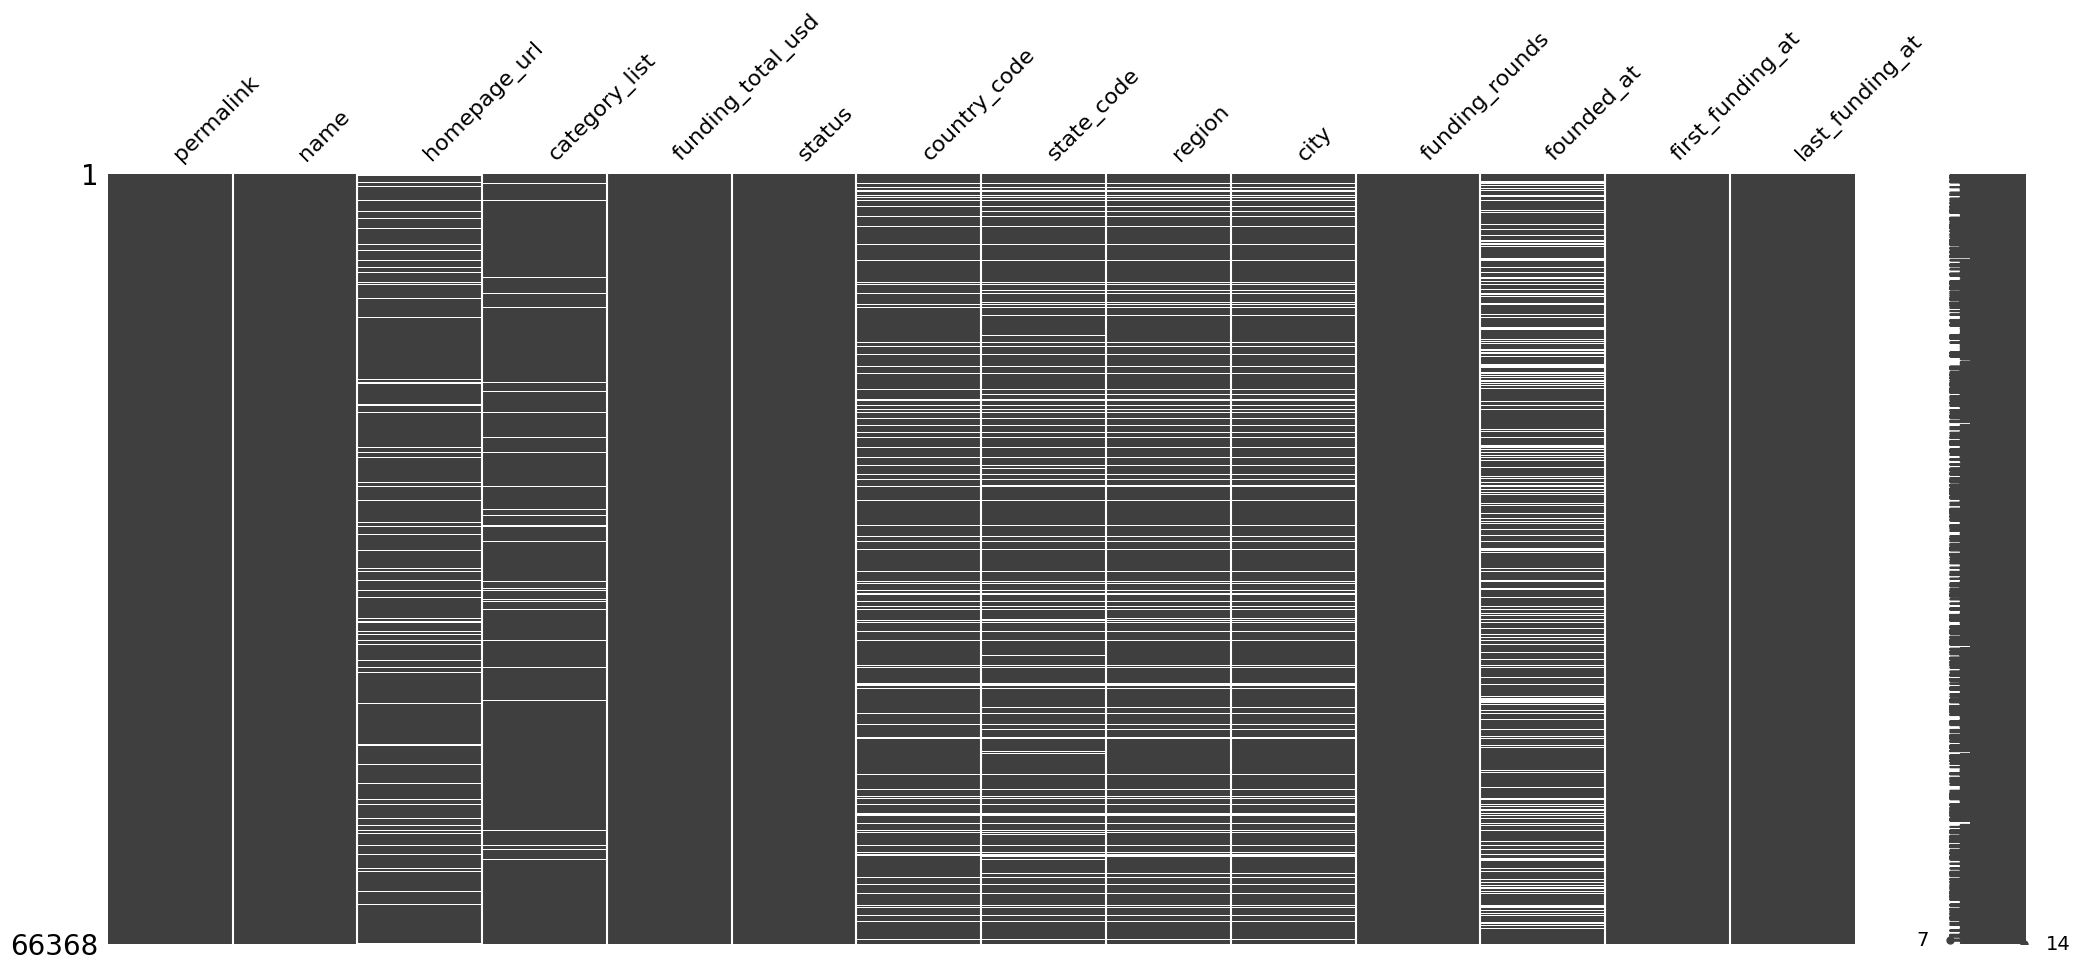

In [6]:
# matrix of null values
msno.matrix(csv)

According to the provided information, there are multiple columns seem to not have any null-value. If that was true, it's a miracle for analysts like us since the cleaning process is no longer a pain. However, life is not always roses and sunshines. As the matter of fact, there are errors existed within these column and we will discover them together

## Distinct *funding_total_usd*, *status*, *funding_rounds*
These columns show that there are no null-values existed within them. But is it true? To check the validity of this information we are going to check if there are distinct values or abnormal values exist within these columns


In the column *funding_total_usd*, there is one abnormal data value, which is "-". This data value is an indication that the data is missing and therefore, we should replace "-" with NaN instead. In addition to the missing data value, from the info given by the code 
```python
csv.info()
```
notice that the dtype of *funding_total_usd* is object type instead of float type. These are the problem that needs to be address later on in the Data Cleaning step

In [7]:
csv[['funding_total_usd']].drop_duplicates(subset='funding_total_usd').sort_values('funding_total_usd', ascending = True).head(10)

,funding_total_usd
4,-
50666,1
48606,10
3649,100
340,1000
1114,10000
16,100000
55,1000000
0,10000000
335,100000000


The *status* column have only 4 clear values, which are operating, acquired, closed, and ipo. There is no null-value or abnormal  in the *funding_rounds* column as well. Therefore, no change is needed for these two columns


In [8]:
csv[['status']].drop_duplicates(subset='status')#.sort_values('funding_total_usd', ascending = True)

,status
0,operating
15,acquired
34,closed
139,ipo


In [9]:
csv[['funding_rounds']].drop_duplicates(subset='funding_rounds')#.sort_values('funding_total_usd', ascending = True)


,funding_rounds
0,1
1,2
7,4
8,3
24,9
25,5
53,6
129,7
144,8
728,10


## Replace "-" with NaN and Reassigning Data Type of *funding_total_usd*
In the *funding_total_usd* column, we can see that there is a value "-" exist within *funding_total_usd*. This indicate that the data is missing (aka null). So to solve this issue we need to replace "-" with None and set the dtype of this column to float. The following codes will have us do just that:

In [10]:
# Convert column to int, handling '-' and non-numeric values
def convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        return None

csv['funding_total_usd'] = csv['funding_total_usd'].apply(convert_to_int)

## Null-Value Visualization
One good practice when in data cleaning and dealing with null-values is visualizing the null-values. This practice allow us to better understand the distribution of the null values in the dataset and see if there are correlation between variables

### Null-Value Matrix

This matrix shows us the distribution of the null values existed within each columns

<AxesSubplot: >

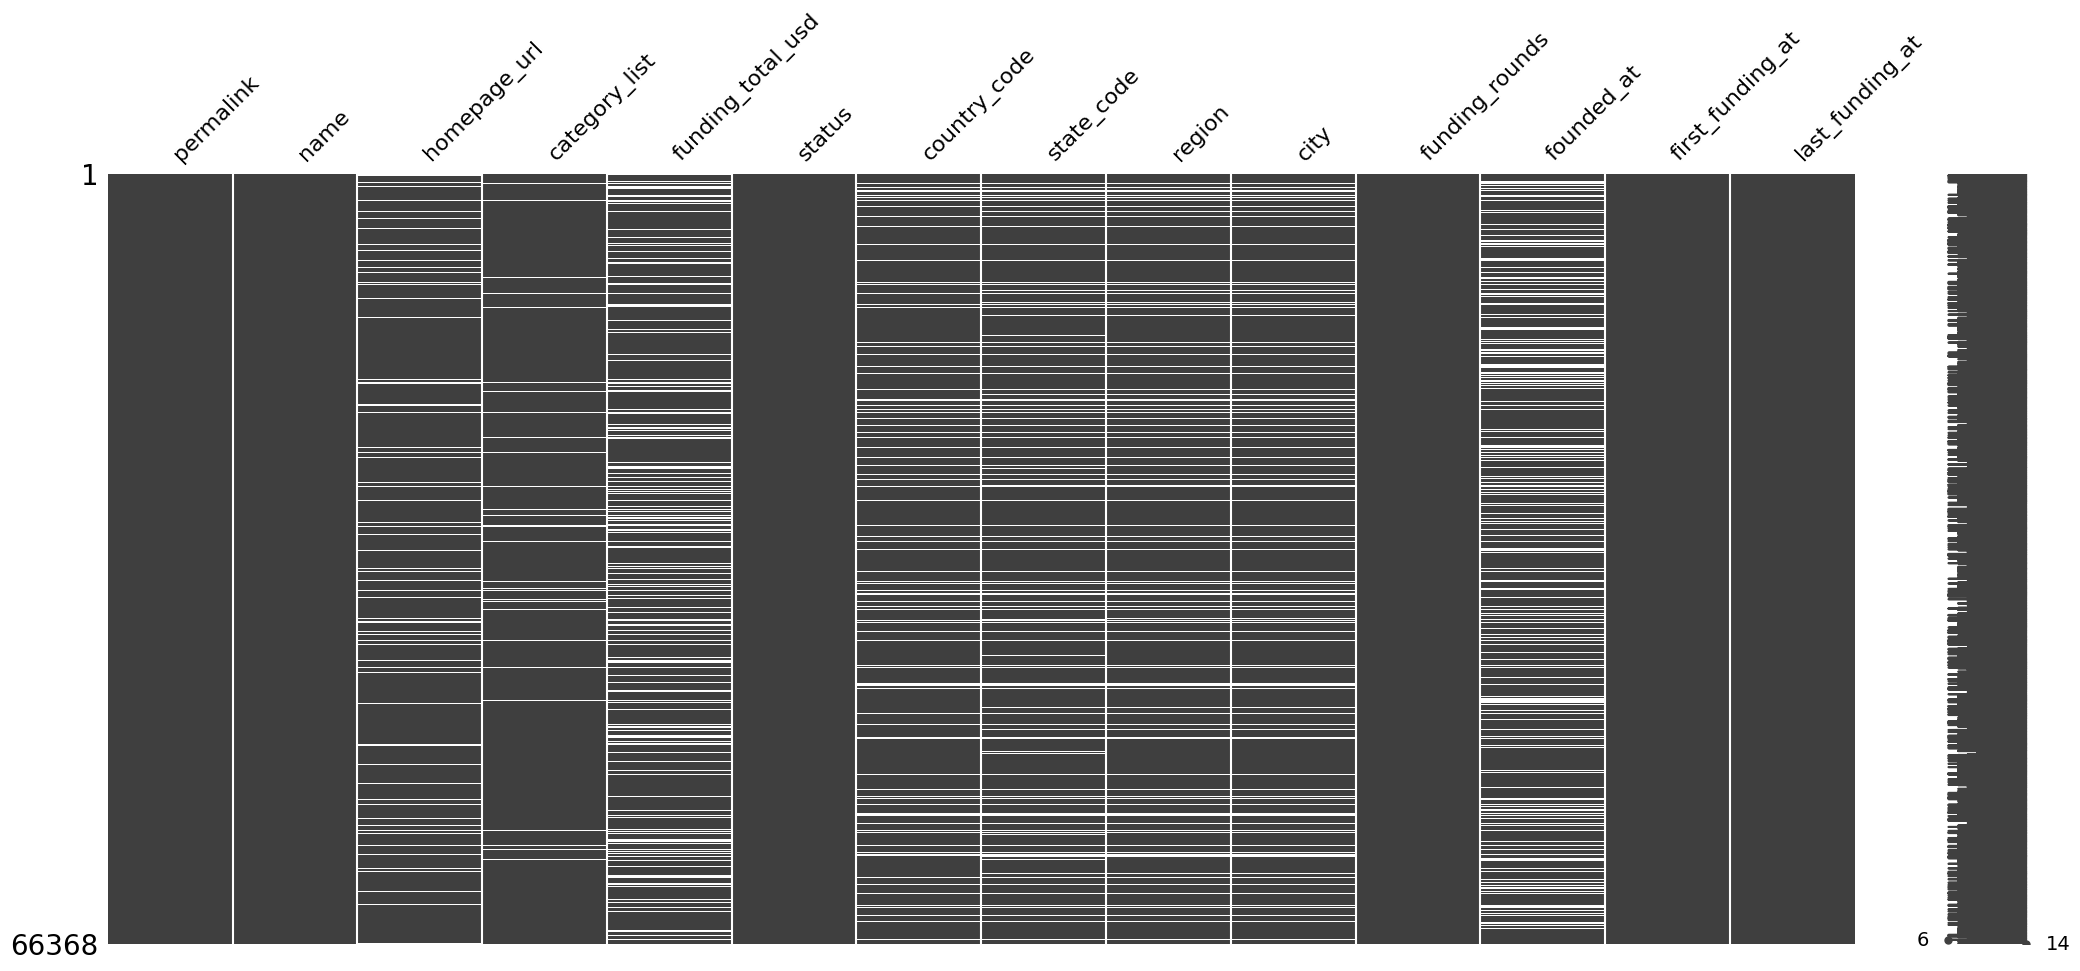

In [11]:
msno.matrix(csv)

### Heatmap

<AxesSubplot: >

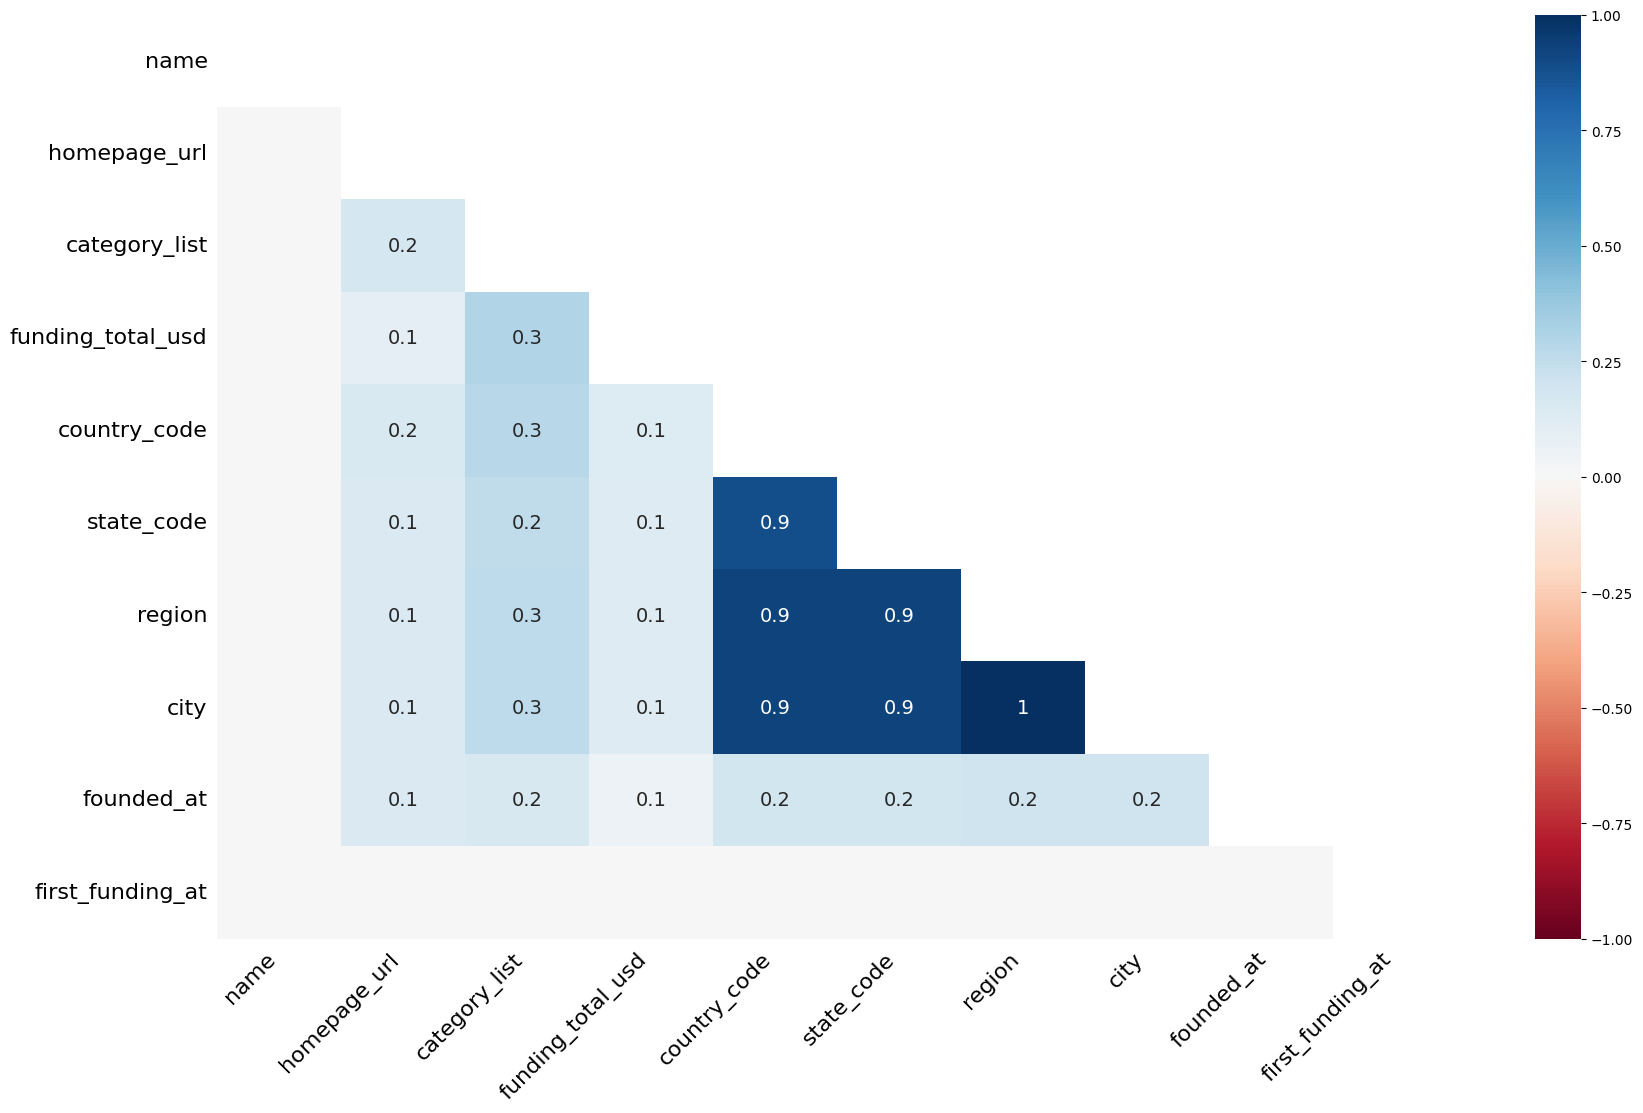

In [12]:
msno.heatmap(csv)

In [13]:
# querying the columns that potentially be useful for analysis and 
companies = csv[['category_list','funding_total_usd','status','country_code','funding_rounds']]

In [14]:
companies['funding_total_usd'] = companies['funding_total_usd'].apply(convert_to_int)

/tmp/ipykernel_20/2711144642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies['funding_total_usd'] = companies['funding_total_usd'].apply(convert_to_int)


In [15]:
companies.isnull().sum()

category_list         3148
funding_total_usd    13723
status                   0
country_code          6958
funding_rounds           0
dtype: int64

In [16]:
companies.shape

(66368, 5)

In [17]:
companies.query("category_list.isnull() and country_code.isnull() and funding_total_usd.isnull()")# and funding_total_usd.isnull() and country_code.isnull()")#" and first_funding_at.isnull()")

,category_list,funding_total_usd,status,country_code,funding_rounds
122,NaN,NaN,operating,NaN,1
160,NaN,NaN,closed,NaN,1
171,NaN,NaN,acquired,NaN,1
213,NaN,NaN,closed,NaN,1
258,NaN,NaN,operating,NaN,1
...,...,...,...,...,...
66000,NaN,NaN,operating,NaN,1
66007,NaN,NaN,acquired,NaN,1
66120,NaN,NaN,operating,NaN,1
66298,NaN,NaN,operating,NaN,1
